In [1]:
import copy
import time
import random
import itertools
import numpy as np
import networkx as nx

In [2]:
%matplotlib inline
from IPython import display
from IPython.html import widgets
from IPython.display import display, clear_output

from matplotlib import pyplot as plt

/usr/local/lib/python3.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [3]:
random_fitness = lambda: random.uniform(-10, 10)

class Node(object):
    def __init__(self, name, value=None):
        self.value = value
        self.name = name
    
    def __str__(self):
        return str(self.name)

In [4]:
values = [0, 1] # binary strings
colors = {0: 'b', 1: 'r'}

class Model(object):
    def __init__(self, n, k, graph=None, fitness_table=None):
        self.n, self.k = n, k
        self.graph = graph or self.generate_graph()
        self.fitness_table = fitness_table or self.random_fitness()
        self.nodes = list(self.graph.nodes)
    
    def generate_graph(self):
        nodes = [Node(i, random.choice(values))
                 for i in range(self.n)]
        g = nx.Graph()
        for i in range(self.n):
            for j in range(1, self.k+1):
                g.add_edge(nodes[i], nodes[(i+j) % self.n])
        return g

    def random_fitness(self):
        xs = itertools.product(*([values] * (self.k+1)))
        return {x: random_fitness() for x in xs}
    
    def fitness(self):
        total_fitness = 0
        node_vals = [n.value for n in self.nodes]
        for i in range(self.n):
            j = (i + self.k)
            lookup = np.take(node_vals, range(i, j+1), mode='wrap')
            total_fitness +=  self.fitness_table[tuple(lookup)]
        return total_fitness
    
    def flip_random_bit(self):
        node = random.choice(self.nodes)
        node.value = random.choice(values)
    
    def draw(self, ax):
        cs = [colors[n.value] for n in self.nodes]
        nx.draw_shell(model.graph, node_color=cs, with_labels=True)

In [5]:
def optimize(model, niters=100):
    for i in range(niters):
        prev_model = copy.deepcopy(model)
        prev_fit = prev_model.fitness()
        model.flip_random_bit()
        new_fit = model.fitness()
        yield model
        
        if new_fit < prev_fit:
            model = prev_model

In [6]:
model = Model(10, 4)
print(model.fitness_table.keys())
print([n.value for n in model.nodes])
model.fitness()

dict_keys([(0, 0, 0, 0, 0), (0, 0, 0, 0, 1), (0, 0, 0, 1, 0), (0, 0, 0, 1, 1), (0, 0, 1, 0, 0), (0, 0, 1, 0, 1), (0, 0, 1, 1, 0), (0, 0, 1, 1, 1), (0, 1, 0, 0, 0), (0, 1, 0, 0, 1), (0, 1, 0, 1, 0), (0, 1, 0, 1, 1), (0, 1, 1, 0, 0), (0, 1, 1, 0, 1), (0, 1, 1, 1, 0), (0, 1, 1, 1, 1), (1, 0, 0, 0, 0), (1, 0, 0, 0, 1), (1, 0, 0, 1, 0), (1, 0, 0, 1, 1), (1, 0, 1, 0, 0), (1, 0, 1, 0, 1), (1, 0, 1, 1, 0), (1, 0, 1, 1, 1), (1, 1, 0, 0, 0), (1, 1, 0, 0, 1), (1, 1, 0, 1, 0), (1, 1, 0, 1, 1), (1, 1, 1, 0, 0), (1, 1, 1, 0, 1), (1, 1, 1, 1, 0), (1, 1, 1, 1, 1)])
[1, 0, 1, 1, 0, 0, 1, 1, 0, 0]


-6.23071036256264

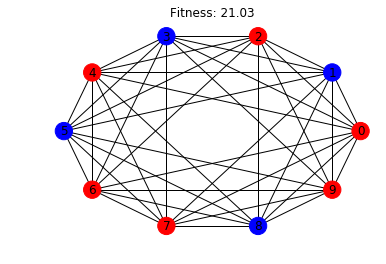

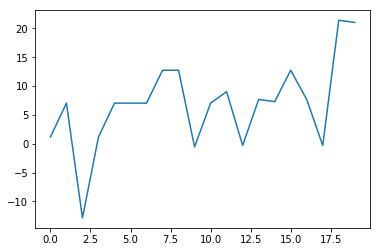

In [7]:
f = plt.gcf()
ax = plt.gca()
fits = []

for model in optimize(model, niters=20):
    plt.clf(); plt.cla()
    model.draw(ax)
    fit = model.fitness()
    plt.title("Fitness: {:.2f}".format(fit))
    fits.append(fit)
    clear_output(wait=True)
    display(f)
    time.sleep(0.1)

plt.clf()
plt.plot(fits)
plt.show()